<a href="https://colab.research.google.com/github/toluwee/How-thick-is-this-anyway-/blob/main/Rheology_prediction_with_blending_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

 

*   Predict the apparent viscosity of CO2 foam fracturing fluid stabilized with nanoparticle  using blending (a stacking variant) machine learning ensemble model.
*   Determine the influence of various parameters on apparent viscosity prediction.



# About The Dataset
329 input data points were compiled from the published results of Xiao et al. (2017), Fu and Liu (2020) and Fu and Liu (2021) laboratory rheology experiments on stabilized CO2-foam at high temperatures and pressure for hydraulic fracturing. 
The dataset we obtained contained 329 data records, comprising 224, 60, 45 data from the studies by Xiao et al. (2017), Fu and Liu (2020), and Fu and Liu (2021), respectively. 


The following is a description of the dataset.
					
**Attribute Information:**

| Position | Feature | Description |Feature Type |
|------:|:-----|---------|---------|
|[, 1]|	temp	|Temperature, centigrade|Numerical|
|[, 2]|	np_conc|	Nanoparticle conc., %wt |Numerical|
|[, 3]|	surf_conc|	Surfactant conc., %wt |Numerical|
|[, 4]|	salinity|	Salinity, %wt |Numerical|
|[, 5]|	foam_qual|	Foam quality, %|Numerical|
|[, 4]|	salinity|	Salinity, %wt |Numerical||
|[, 6]|	shear|	Shear rate, s-1 |Numerical|
|[, 7]|	pressure|	Pressure, psi |Numerical|
|[, 8]|	np_size|	Nanoparticle size, nm |Numerical|
|[, 9]|	app_vis|	Apparent viscosity, cp|Numerical|


# Import

### Import Libraries


In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

from scipy.stats import uniform
from scipy.stats import randint


from sklearn.model_selection import KFold

from math import sqrt
from numpy import asarray
from sklearn.datasets import make_regression

from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import tensorflow as tf
from tensorflow import keras


from numpy import hstack
from numpy import vstack
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor



import joblib


### Import Libraries


### Load Dataset

In [2]:
# filepath = "https://toludata.s3.us-east-2.amazonaws.com/Viscosity_data_comprehensive.csv"
# filepath = "https://toludata.s3.us-east-2.amazonaws.com/np_surf_viscosity_data.csv"

filepath =  "https://toludata.s3.us-east-2.amazonaws.com/np_surf_viscosity_data2.csv"

dataset = pd.read_csv(filepath)

# Descriptive Statistics

In [3]:
# shape
dataset.shape

(330, 9)

In [4]:
# head
dataset.head(20)

,temp,np_conc,surf_conc,salinity,foam_qual,shear,pressure,np_size,app_vis
0,40,0.5,0.0,0.0,80.0,6544,1140,17.5,0.57
1,40,0.5,0.0,0.0,80.0,9838,1140,17.5,0.51
2,40,0.5,0.0,0.0,80.0,13101,1140,17.5,0.47
3,40,0.5,0.0,0.0,80.0,16396,1140,17.5,0.44
4,40,0.5,0.0,0.0,70.0,6736,1140,17.5,0.60
5,40,0.5,0.0,0.0,70.0,10155,1140,17.5,0.52
6,40,0.5,0.0,0.0,70.0,13513,1140,17.5,0.48
7,40,0.5,0.0,0.0,70.0,16935,1140,17.5,0.44
8,40,0.5,0.0,0.0,60.0,6581,1140,17.5,0.69
9,40,0.5,0.0,0.0,60.0,9874,1140,17.5,0.61


In [5]:
dataset.describe()

,temp,np_conc,surf_conc,salinity,foam_qual,shear,pressure,np_size,app_vis
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,40.400000,0.496515,0.007264,3.284848,64.787879,8867.554545,1310.666667,30.248485,4.596818
std,10.621307,0.040079,0.006232,2.324198,13.575764,4763.579281,167.579345,25.309850,5.748778
min,20.000000,0.050000,0.000000,0.000000,10.000000,1338.000000,1140.000000,7.000000,0.410000
25%,40.000000,0.500000,0.000000,0.000000,60.000000,4343.000000,1140.000000,7.000000,1.097500
50%,40.000000,0.500000,0.010000,5.000000,70.000000,8925.000000,1300.000000,17.500000,1.960000
75%,40.000000,0.500000,0.010000,5.000000,70.000000,12708.250000,1550.000000,65.000000,5.182500
max,72.000000,0.700000,0.030000,11.000000,90.000000,17850.000000,1550.000000,65.000000,34.540000


In [6]:
#types
dataset.dtypes

temp           int64
np_conc      float64
surf_conc    float64
salinity     float64
foam_qual    float64
shear          int64
pressure       int64
np_size      float64
app_vis      float64
dtype: object

# Preprocessing

In [8]:
dataset = dataset.drop_duplicates()
dataset = dataset.dropna( how='all')
dataset.shape

(329, 9)

# Create Test Dataset -Stratify

In [ ]:
# Find feature most correlated with the target variable
corr_matrix = dataset.corr()
abs(corr_matrix['app_vis']).sort_values(ascending=False)

app_vis      1.000000
shear        0.599003
np_size      0.493524
salinity     0.442316
surf_conc    0.203663
temp         0.168276
np_conc      0.057044
pressure     0.027271
foam_qual    0.016153
Name: app_vis, dtype: float64

In [ ]:
# categorize values in the feature
dataset['new_cat'] = pd.qcut(dataset["app_vis"], 4, labels=[1, 2, 3,4])

In [ ]:
dataset.head()

,temp,np_conc,surf_conc,salinity,foam_qual,shear,pressure,np_size,app_vis,new_cat
0,40,0.5,0.0,0.0,80.0,6544,1140,17.5,0.57,1
1,40,0.5,0.0,0.0,80.0,9838,1140,17.5,0.51,1
2,40,0.5,0.0,0.0,80.0,13101,1140,17.5,0.47,1
3,40,0.5,0.0,0.0,80.0,16396,1140,17.5,0.44,1
4,40,0.5,0.0,0.0,70.0,6736,1140,17.5,0.60,1


In [ ]:
train_full, test_full = train_test_split(dataset, test_size=.2, random_state=42, stratify=dataset['new_cat'])

In [ ]:
dataset['new_cat'].value_counts() / len(dataset)

1    0.25228
2    0.24924
3    0.24924
4    0.24924
Name: new_cat, dtype: float64

In [ ]:
test_full['new_cat'].value_counts() / len(test_full)

1    0.257576
4    0.257576
2    0.242424
3    0.242424
Name: new_cat, dtype: float64

In [ ]:
train_full.describe()

,temp,np_conc,surf_conc,salinity,foam_qual,shear,pressure,np_size,app_vis
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,40.057034,0.497148,0.007285,3.129278,64.638783,8990.684411,1313.384030,31.283270,4.528175
std,10.315656,0.037598,0.006245,2.358681,13.833895,4750.596018,170.200692,25.543194,5.670415
min,20.000000,0.050000,0.000000,0.000000,10.000000,1338.000000,1140.000000,7.000000,0.410000
25%,40.000000,0.500000,0.000000,0.000000,60.000000,4343.000000,1140.000000,7.000000,1.105000
50%,40.000000,0.500000,0.010000,5.000000,70.000000,8925.000000,1300.000000,17.500000,1.940000
75%,40.000000,0.500000,0.010000,5.000000,70.000000,12687.500000,1550.000000,65.000000,5.050000
max,71.000000,0.700000,0.030000,11.000000,90.000000,17850.000000,1550.000000,65.000000,34.540000


In [ ]:
test_full.describe()

,temp,np_conc,surf_conc,salinity,foam_qual,shear,pressure,np_size,app_vis
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,42.075758,0.493939,0.007288,3.878788,66.212121,8467.393939,1300.000000,26.477273,4.816515
std,11.504261,0.049237,0.006209,2.101393,10.635955,4807.813202,158.841963,24.194633,6.116366
min,20.000000,0.100000,0.000000,0.000000,50.000000,1447.000000,1140.000000,7.000000,0.460000
25%,40.000000,0.500000,0.000000,2.000000,60.000000,4343.000000,1140.000000,7.000000,1.030000
50%,40.000000,0.500000,0.010000,5.000000,70.000000,6685.500000,1300.000000,17.500000,1.975000
75%,43.000000,0.500000,0.010000,5.000000,70.000000,13031.000000,1300.000000,65.000000,5.182500
max,72.000000,0.500000,0.020000,9.000000,90.000000,17850.000000,1550.000000,65.000000,30.980000


In [ ]:
# Seperate output and input variables
drop_list = ["new_cat", "app_vis"]
train_X, test_X, y_train, y_test = train_full.drop(drop_list, axis=1), test_full.drop(drop_list, axis=1),train_full["app_vis"], test_full["app_vis"]

In [ ]:
y_test_shap = y_test
y_train_shap = y_train

In [ ]:
train_full.drop("new_cat", axis = 1, inplace = True)
test_full.drop("new_cat", axis = 1, inplace = True)

# Transform


In [25]:
scaler = StandardScaler()


X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)


In [26]:
y_train= y_train.values.ravel()
y_test = y_test.values.ravel()

# Define Utilities

In [27]:
# Create function to evaluate model

def evaluate_model(model, X, y, scoring, cv):
  # evaluate the model with cross-validation and mean squareed error
  scores = cross_val_score(estimator=model, X=X, y=y, 
                           scoring= scoring, cv=cv,
                           n_jobs = -1)
  # Force positive output
  scores = np.abs(scores)
  # Output the result
  print("RMSE: ", scores.mean(), "(", scores.std(), ")")

In [28]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'neg_root_mean_squared_error'
cv = RepeatedKFold(n_splits=num_folds, random_state=seed)



# KNN

In [29]:
# define the base model
model = KNeighborsRegressor()

# evaluate model
evaluate_model(model, X_train, y_train,scoring, cv) 

RMSE:  1.4074618951701956 ( 1.013576855282395 )


## Fine-tune Algorithm

In [30]:
# define the base model
model = KNeighborsRegressor() 

param_dist = {
    'n_neighbors' : randint(3, 10),
    # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : randint(10, 100),
    'p': [1,2]

    }

rnd_search = RandomizedSearchCV(estimator= model, param_distributions=param_dist,cv=cv,
                           scoring=scoring, return_train_score=True, random_state = seed,
                           verbose =2, n_jobs=-1,)
rnd_search.fit(X_train, y_train)

rnd_search.best_params_

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


{'leaf_size': 62, 'n_neighbors': 4, 'p': 2}

In [31]:
# Define base model
model_KNN =rnd_search.best_estimator_

# evaluate model
evaluate_model(model_KNN,X_train, y_train, scoring,cv)

RMSE:  1.254995237196403 ( 1.040691886779007 )


In [32]:
# Fit the model on the training set

fitted_KNN = model_KNN.fit(X_train, y_train)

In [33]:
KNN_pred_train = fitted_KNN.predict(X_train)
KNN_pred = fitted_KNN.predict(X_test)
KNN_pred_full = fitted_KNN.predict(X_test)

In [34]:
# evaluate model
evaluate_model(model_KNN,X_test, y_test, scoring,cv)

RMSE:  2.942472436303932 ( 2.212667298352544 )


## Plot Predicted vs Measured

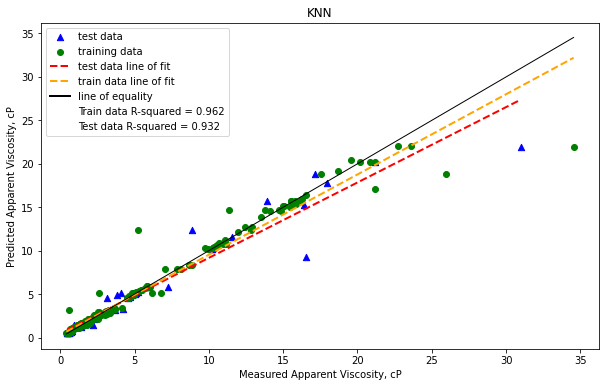

In [35]:
# Plot predicted vs Measured for Apparent Viscosity
predicted = KNN_pred_train
predicted2 = KNN_pred

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, predicted2 , c='blue', marker = "^", s = 40, label ='test data ')
ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predicted2, 1).flatten())(np.unique(y_test)),color='red', linestyle='dashed', lw=2)
ax.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predicted, 1).flatten())(np.unique(y_train)),color='orange', linestyle='dashed', lw=2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='-', lw=1)

ax.set_title ('KNN')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')

r2_train = f'Train data R-squared = {round(r2_score(y_train, predicted), 3 )}'
r2_test = f'Test data R-squared = {round(r2_score(y_test, predicted2), 3 )}'

# Extend the legend to include the line of fit
handles, labels = plt.gca().get_legend_handles_labels()

line = Line2D([0], [0], label='test data line of fit', color='red', linestyle='dashed', lw=2)
line2 = Line2D([0], [0], label='train data line of fit', color='orange', linestyle='dashed', lw=2)
line3 = Line2D([0], [0], label='line of equality', color='black', linestyle='solid', lw=2)
text1 = mpatches.Patch(color='none', label=r2_train)
text2 = mpatches.Patch(color='none', label=r2_test)
handles.extend([line, line2,line3,text1, text2])

plt.legend(handles=handles)

plt.show()





# SVR

In [36]:
# define the base model
model = SVR()

# evaluate model
evaluate_model (model, X_train, y_train,scoring, cv)

RMSE:  2.7393793337446772 ( 1.3718553082911684 )


## Fine-tune Algorithm

In [37]:
# define the base model
model = SVR() 

# define hyperparameter values
param_dist = {
    # "kernel": ['linear', 'sigmoid','poly', 'rbf', ],
    'C' : randint(1, 100),
    'gamma' : uniform(0.01,1.5),
    # 'degree' : (1,10),
    
    }

# Implement randomized search on hyper parameters
rnd_search = RandomizedSearchCV(estimator= model, param_distributions=param_dist,cv=cv,
                           scoring=scoring, return_train_score=True, random_state = seed,
                           verbose =2, n_jobs=-1)

# Fit to training dataset
rnd_search.fit(X_train, y_train)

rnd_search.best_params_

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


{'C': 83, 'gamma': 0.15996237372700434}

In [38]:
# Define base model
model_SVR =rnd_search.best_estimator_

# evaluate model
evaluate_model(model_SVR, X_train, y_train, scoring, cv)

RMSE:  0.9830047646419463 ( 0.8534291124478595 )


In [39]:
modelu = SVR().fit(X_train, y_train)

In [40]:
# RMSE:  0.6680246429065437 ( 0.54604232631087 )

In [41]:
# Fit the model on the training set and time the execution
fitted_SVR = model_SVR.fit(X_train, y_train)

#predict using training data
SVR_pred_train = fitted_SVR.predict(X_train)

#predict using test data
SVR_pred = fitted_SVR.predict(X_test)

# evaluate model
evaluate_model (model_SVR, X_test, y_test,scoring, cv)

RMSE:  1.8336010800814435 ( 1.9556211729095252 )


## Plot Predicted vs Measured

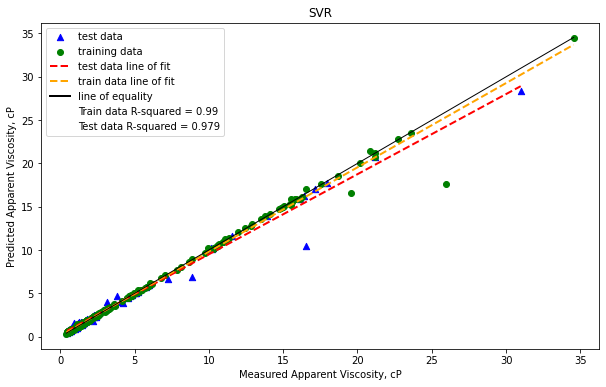

In [42]:
# Plot predicted vs Measured for Apparent Viscosity
predicted = SVR_pred_train
predicted2 = SVR_pred

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, predicted2 , c='blue', marker = "^", s = 40, label ='test data ')
ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predicted2, 1).flatten())(np.unique(y_test)),color='red', linestyle='dashed', lw=2)
ax.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predicted, 1).flatten())(np.unique(y_train)),color='orange', linestyle='dashed', lw=2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='-', lw=1)

ax.set_title ('SVR')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')

r2_train = f'Train data R-squared = {round(r2_score(y_train, predicted), 3 )}'
r2_test = f'Test data R-squared = {round(r2_score(y_test, predicted2), 3 )}'

# Extend the legend to include the line of fit
handles, labels = plt.gca().get_legend_handles_labels()

line = Line2D([0], [0], label='test data line of fit', color='red', linestyle='dashed', lw=2)
line2 = Line2D([0], [0], label='train data line of fit', color='orange', linestyle='dashed', lw=2)
line3 = Line2D([0], [0], label='line of equality', color='black', linestyle='solid', lw=2)
text1 = mpatches.Patch(color='none', label=r2_train)
text2 = mpatches.Patch(color='none', label=r2_test)
handles.extend([line, line2,line3,text1, text2])

plt.legend(handles=handles)

plt.show()

# ANN

## Utilities

In [43]:
# Create function to build and compile a Keras model
from tensorflow.keras.constraints import max_norm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, RMSprop


def build_model(n_hidden=1, n_neurons=20, learning_rate = 3e-3, input_shape = X_train.shape[1:]): # explicitly state no of features as input_shape
  model = Sequential()
  options = {"input_shape": input_shape}

  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation="relu", 

                    **options))
    options ={} # so that input_shape option only applies to first layer

  model.add(Dense(1, activation="linear",  

                  **options)) #output layer

  optimizer = RMSprop(learning_rate)
  model.compile(loss = "mse", optimizer = optimizer) # mse represents l2 loss

  return model



## Fine-tune Algorithm

In [44]:
model_ANN = build_model()
fitted_ANN = model_ANN.fit(X_train, y_train,
        epochs = 300, batch_size = 20,
        validation_split = 0.2,
        callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose =0)

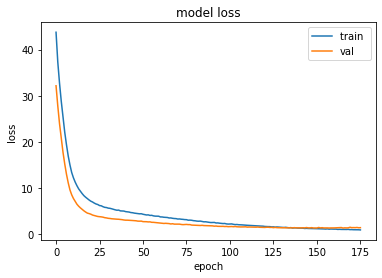

In [45]:
# summarize history for loss
plt.plot(fitted_ANN.history['loss'])
plt.plot(fitted_ANN.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train ', 'val' ], loc= 'upper right' )
plt.show()

In [46]:
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_ANN.evaluate(X_train,y_train)

9/9 [==============================] - 0s 4ms/step - loss: 1.0018


1.0017602443695068

In [48]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [49]:
ANN_pred_train = model_ANN.predict(X_train)
ANN_pred = model_ANN.predict(X_test)

In [50]:
print (mean_squared_error(y_train,ANN_pred_train, squared=False))
print (mean_squared_error(y_test,ANN_pred, squared=False))

1.000879641561916
1.2995275756705775


## Plot Predicted vs Measured

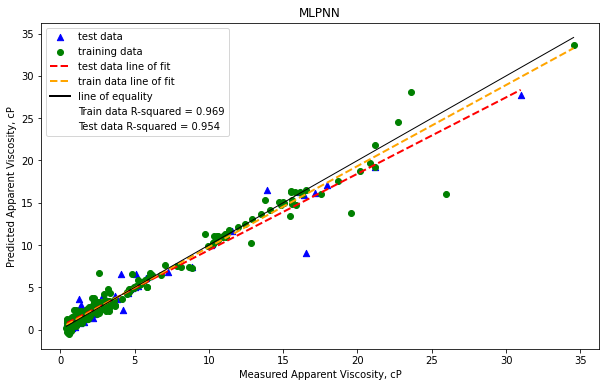

In [52]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = ANN_pred_train
predicted2 = ANN_pred

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, predicted2 , c='blue', marker = "^", s = 40, label ='test data ')
ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predicted2, 1).flatten())(np.unique(y_test)),color='red', linestyle='dashed', lw=2)
ax.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predicted, 1).flatten())(np.unique(y_train)),color='orange', linestyle='dashed', lw=2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='-', lw=1)

ax.set_title ('MLPNN')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')


r2_train = f'Train data R-squared = {round(r2_score(y_train, predicted), 3 )}'
r2_test = f'Test data R-squared = {round(r2_score(y_test, predicted2), 3 )}'

# Extend the legend to include the line of fit
handles, labels = plt.gca().get_legend_handles_labels()

line = Line2D([0], [0], label='test data line of fit', color='red', linestyle='dashed', lw=2)
line2 = Line2D([0], [0], label='train data line of fit', color='orange', linestyle='dashed', lw=2)
line3 = Line2D([0], [0], label='line of equality', color='black', linestyle='solid', lw=2)
text1 = mpatches.Patch(color='none', label=r2_train)
text2 = mpatches.Patch(color='none', label=r2_test)
handles.extend([line, line2,line3,text1, text2])

plt.legend(handles=handles)

plt.show()

# MPR

In [53]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# define the base model
model_MPR = LinearRegression()

# evaluate model
evaluate_model(model_MPR, X_train_poly, y_train,scoring, cv)

RMSE:  1.6929783021053038 ( 0.7722731502241751 )


In [55]:
# Fit the model on the training set and time the execution
fitted_MPR = model_MPR.fit(X_train_poly, y_train)

#predict using training data
MPR_pred_train = fitted_MPR.predict(X_train_poly)

#predict using test data
MPR_pred = fitted_MPR.predict(X_test_poly)

## Plot Predicted vs Measured

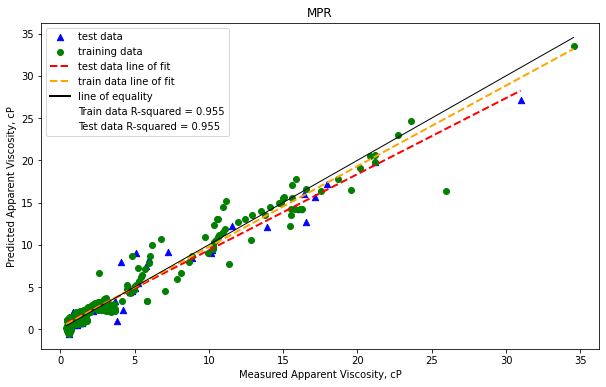

In [61]:
# Plot predicted vs Measured for Apparent Viscosity
predicted = MPR_pred_train
predicted2 = MPR_pred

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(y_test, predicted2 , c='blue', marker = "^", s = 40, label ='test data ')
ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predicted2, 1))(np.unique(y_test)),color='red', linestyle='dashed', lw=2)
ax.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predicted, 1))(np.unique(y_train)),color='orange', linestyle='dashed', lw=2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='-', lw=1)

ax.set_title ('MPR')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')

r2_train = f'Train data R-squared = {round(r2_score(y_train, predicted), 3 )}'
r2_test = f'Test data R-squared = {round(r2_score(y_test, predicted2), 3 )}'

# Extend the legend to include the line of fit
handles, labels = plt.gca().get_legend_handles_labels()

line = Line2D([0], [0], label='test data line of fit', color='red', linestyle='dashed', lw=2)
line2 = Line2D([0], [0], label='train data line of fit', color='orange', linestyle='dashed', lw=2)
line3 = Line2D([0], [0], label='line of equality', color='black', linestyle='solid', lw=2)
text1 = mpatches.Patch(color='none', label=r2_train)
text2 = mpatches.Patch(color='none', label=r2_test)
handles.extend([line, line2,line3,text1, text2])

plt.legend(handles=handles)

plt.show()

# CART

In [62]:
# define the base model
model = DecisionTreeRegressor()

# wrapper = MultiOutputRegressor(model)
evaluate_model(model, X_train, y_train,scoring, cv)

RMSE:  1.1647485766199204 ( 0.8946375433347556 )


## Fine-tune Algorithm

In [63]:
# define the base model
model = DecisionTreeRegressor(random_state= 42,) 

param_dist = {
    "max_depth": randint(2, 10),
    "min_samples_split": randint(2, 10),
    # 'min_samples_leaf' : randint(1, 100),
    # # 'max_features' : ["auto", "sqrt", "log2"],
    # "max_leaf_nodes": randint(2, 100),
    }

rnd_search = RandomizedSearchCV(estimator= model, param_distributions=param_dist,cv=cv,
                           scoring=scoring, return_train_score=True, random_state = seed,
                           verbose =2, n_jobs=-1,)
rnd_search.fit(X_train, y_train)

rnd_search.best_params_

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


{'max_depth': 9, 'min_samples_split': 4}

In [64]:
# Define model
model_CART =rnd_search.best_estimator_

# evaluate model
evaluate_model(model_CART,X_train, y_train, scoring,cv)

RMSE:  1.1839841008390497 ( 0.9181906687607385 )


In [65]:
# Fit the model on the training set
fitted_CART = model_CART.fit(X_train, y_train)


In [66]:
CART_pred_train = fitted_CART.predict(X_train)
CART_pred = fitted_CART.predict(X_test)

In [67]:
# evaluate model
evaluate_model(model_CART,X_test, y_test, scoring,cv)

RMSE:  2.255754253557414 ( 2.2443199654563504 )


## Plot Predicted vs Measured

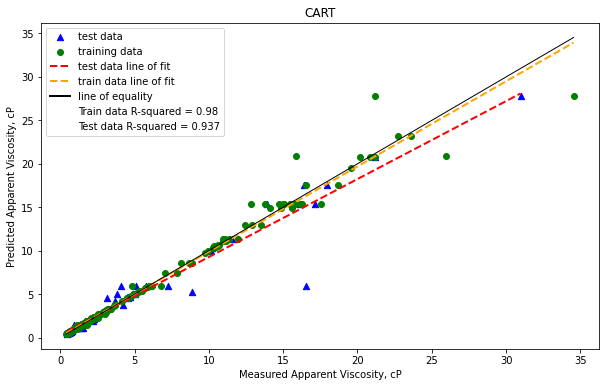

In [68]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = CART_pred_train
predicted2 = CART_pred

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, predicted2 , c='blue', marker = "^", s = 40, label ='test data ')
ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predicted2, 1).flatten())(np.unique(y_test)),color='red', linestyle='dashed', lw=2)
ax.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predicted, 1).flatten())(np.unique(y_train)),color='orange', linestyle='dashed', lw=2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='-', lw=1)

ax.set_title ('CART')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')


r2_train = f'Train data R-squared = {round(r2_score(y_train, predicted), 3 )}'
r2_test = f'Test data R-squared = {round(r2_score(y_test, predicted2), 3 )}'

# Extend the legend to include the line of fit
handles, labels = plt.gca().get_legend_handles_labels()

line = Line2D([0], [0], label='test data line of fit', color='red', linestyle='dashed', lw=2)
line2 = Line2D([0], [0], label='train data line of fit', color='orange', linestyle='dashed', lw=2)
line3 = Line2D([0], [0], label='line of equality', color='black', linestyle='solid', lw=2)
text1 = mpatches.Patch(color='none', label=r2_train)
text2 = mpatches.Patch(color='none', label=r2_test)
handles.extend([line, line2,line3,text1, text2])

plt.legend(handles=handles)

plt.show()

# Super-learner

In [87]:
# create a list of base-models
def get_models():
	models = []
	models.append(('SVR', model_SVR))
	models.append(('MPR', model_MPR)) 
	models.append(('ANN', model_ANN))
	models.append(('CART', model_CART))
	models.append(('KNN', model_KNN))

	return models

# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
 
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
 
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix] 
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
	
		# fit and make predictions with each sub-model
		for name,model in models:
			if name == 'MPR':
				X_train_poly = PolynomialFeatures(degree=degree).fit_transform(train_X)
				test_X_poly = PolynomialFeatures(degree=degree).fit_transform(test_X)
		
				model.fit(X_train_poly, train_y)
				yhat = model.predict(test_X_poly)
		
			elif name == 'ANN':
				model.fit(train_X, train_y, epochs = 500, batch_size = 20, 
					validation_split = 0.2,callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)
				yhat = model.predict(test_X)
		
			else:
				model.fit(train_X, train_y)
				yhat = model.predict(test_X)			

			# store columns
			fold_yhats.append(yhat.reshape(len(yhat),1))
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)

# fit all base models on the training dataset
def fit_base_models(X, y, models):
	
	for name,model in models:
		if name == 'MPR':
			# fit in training set
			X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
			model.fit(X_poly, y)
	 
		elif name == 'ANN':
			model.fit(X, y, epochs = 500, batch_size = 20, 
         validation_split = 0.2,callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)
		else:
			# fit in training set
			model.fit(X, y)	

# fit a meta model
def fit_meta_model(X, y):
	model = LinearRegression()
	model.fit(X, y)
	return model

# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for name, model in models:
		if name == 'MPR':
			X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
			yhat = model.predict(X_poly)
		
		else:
			yhat = model.predict(X)

		mse = mean_squared_error(y, yhat, squared=False)
		# print('%s: RMSE %.3f' % (name, (mse)))
	

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for name, model in models:
		if name == 'MPR':
			X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
			yhat = model.predict(X_poly)

		else:
			yhat = model.predict(X)
		
		meta_X.append(yhat.reshape(len(yhat),1))
	meta_X = hstack(meta_X)
 
	# predict
	yhat_meta = meta_model.predict(meta_X)

	return yhat_meta


X,y = X_train, y_train
X_val, y_val = X_test, y_test 

# get models
models = get_models()

# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)

# fit base models
fit_base_models(X, y, models)

# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)

# evaluate base models
evaluate_models(X_val, y_val, models)

# evaluate meta model
Super_pred = super_learner_predictions(X_val, models, meta_model)

# evaluate meta model
Super_pred_train = super_learner_predictions(X, models, meta_model)


## Plot Predicted vs Measured

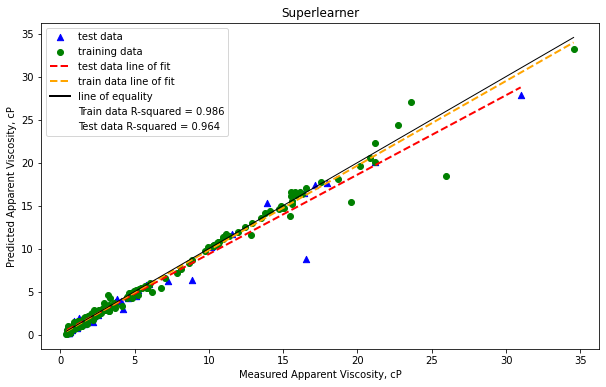

In [88]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = Super_pred_train
predicted2 = Super_pred

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, predicted2 , c='blue', marker = "^", s = 40, label ='test data ')
ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predicted2, 1).flatten())(np.unique(y_test)),color='red', linestyle='dashed', lw=2)
ax.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predicted, 1).flatten())(np.unique(y_train)),color='orange', linestyle='dashed', lw=2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='-', lw=1)

ax.set_title ('Superlearner')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')


r2_train = f'Train data R-squared = {round(r2_score(y_train, predicted), 3 )}'
r2_test = f'Test data R-squared = {round(r2_score(y_test, predicted2), 3 )}'

# Extend the legend to include the line of fit
handles, labels = plt.gca().get_legend_handles_labels()

line = Line2D([0], [0], label='test data line of fit', color='red', linestyle='dashed', lw=2)
line2 = Line2D([0], [0], label='train data line of fit', color='orange', linestyle='dashed', lw=2)
line3 = Line2D([0], [0], label='line of equality', color='black', linestyle='solid', lw=2)
text1 = mpatches.Patch(color='none', label=r2_train)
text2 = mpatches.Patch(color='none', label=r2_test)
handles.extend([line, line2,line3,text1, text2])

plt.legend(handles=handles)

plt.show()

# Blending

In [89]:

# get a list of base models
def get_models():
	models = []
	
	models.append(('SVR', model_SVR))
	models.append(('MPR', model_MPR)) 
	models.append(('ANN', model_ANN))
	models.append(('CART', model_CART))
	models.append(('KNN', model_KNN))

	return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_test, y_train, y_test):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
 
	for name,model in models:
		if name == 'MPR':
			# fit in training set
			X_train_poly1 = PolynomialFeatures(degree=degree).fit_transform(X_train)
			model.fit(X_train_poly1, y_train)
		elif name == 'ANN':
			model.fit(X_train, y_train, epochs = 500, batch_size = 20, 
         validation_split = 0.2,callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)
		else:
			# fit in training set
			model.fit(X_train, y_train)	 
	
		# predict on test set

	for name,model in models:
		if name == 'MPR':
			X_poly= PolynomialFeatures(degree=degree).fit_transform(X_test)
			yhat = model.predict(X_poly) 
		else:
			yhat = model.predict(X_test)
		
	
		mse = mean_squared_error(y_test, yhat, squared=False)
		# print('%s: RMSE %.3f' % (name, (mse)))
		
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
	
		# store predictions as input for blending
		meta_X.append(yhat)
	
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
 
	# define blending model
	blender = (SVR(C= 83, gamma= 0.15996237372700434, kernel= 'rbf'))

	# fit on predictions from base models
	blender.fit(meta_X, y_test)
	return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	
	# make predictions with base models
	meta_X = list()
	for name ,model in models:
		
		# predict with base model
		if name == 'MPR':
			X_poly= PolynomialFeatures(degree=degree).fit_transform(X_test)
			yhat = model.predict(X_poly)
		else:
			yhat = model.predict(X_test)

		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		
		# store prediction
		meta_X.append(yhat)
	
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	
	# predict
	return blender.predict(meta_X)

# # define dataset

X,y = X_train, y_train
X_test, y_test = X_test, y_test 

# create the base models
models = get_models()

# train the blending ensemble
blender = fit_ensemble(models, X, X_test, y, y_test)

blender2 = fit_ensemble(models, X, X, y, y)

Blended_pred = predict_ensemble(models, blender, X_test)

Blended_pred_train = predict_ensemble(models, blender2, X_train)



## Plot Predicted vs Measured

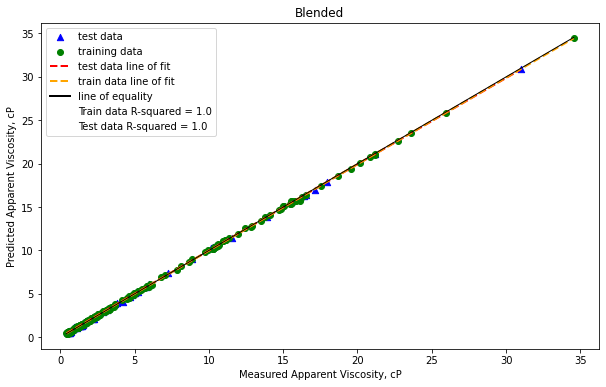

In [92]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = Blended_pred_train
predicted2 = Blended_pred

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, predicted2 , c='blue', marker = "^", s = 40, label ='test data ')
ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predicted2, 1).flatten())(np.unique(y_test)),color='red', linestyle='dashed', lw=2)
ax.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predicted, 1).flatten())(np.unique(y_train)),color='orange', linestyle='dashed', lw=2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='-', lw=1)

ax.set_title ('Blended')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')


r2_train = f'Train data R-squared = {round(r2_score(y_train, predicted), 3 )}'
r2_test = f'Test data R-squared = {round(r2_score(y_test, predicted2), 3 )}'

# Extend the legend to include the line of fit
handles, labels = plt.gca().get_legend_handles_labels()

line = Line2D([0], [0], label='test data line of fit', color='red', linestyle='dashed', lw=2)
line2 = Line2D([0], [0], label='train data line of fit', color='orange', linestyle='dashed', lw=2)
line3 = Line2D([0], [0], label='line of equality', color='black', linestyle='solid', lw=2)
text1 = mpatches.Patch(color='none', label=r2_train)
text2 = mpatches.Patch(color='none', label=r2_test)
handles.extend([line, line2,line3,text1, text2])

plt.legend(handles=handles)

plt.show()

# Evaluations

In [93]:
models_train =[]
models_test =[]

models_train.append(('SVR', SVR_pred_train))
models_train.append(('KNN', KNN_pred_train))
models_train.append(('CART', CART_pred_train))
models_train.append(('ANN', ANN_pred_train))
models_train.append(('MPR', MPR_pred_train))
models_train.append(('Super learner', Super_pred_train))
models_train.append(('Blended', Blended_pred_train))




models_test.append(('SVR', SVR_pred))
models_test.append(('KNN', KNN_pred))
models_test.append(('CART', CART_pred))
models_test.append(('ANN', ANN_pred))
models_test.append(('MPR', MPR_pred))
models_test.append(('Super learner', Super_pred))
models_test.append(('Blended', Blended_pred))

## MSE 

In [94]:
# Compare Models using MSE for train set
results = {}

# Evaluate each model in turn
for name, predict_val in models_train:
    cv_results = mean_squared_error(y_train, predict_val, squared=True)
    cv_results = round(np.abs(cv_results), 3 )
    results[name] = cv_results

mse_train = pd.DataFrame(results, index =['mse_train',] )

The SVR has the lowest error

In [95]:
# Compare Models using MSE for test set
results = {}

# Evaluate each model in turn
for name, predict_val in models_test:
    cv_results = mean_squared_error(y_test, predict_val,squared=True)
    cv_results = round(np.abs(cv_results), 3 )
    results[name] = cv_results

mse_test = pd.DataFrame(results, index =['mse_test',] )

## RMSE 

In [96]:
# Compare Models using RMSE for train set
results = {}

# Evaluate each model in turn

for name, predict_val in models_train:
    cv_results = mean_squared_error(y_train, predict_val, squared=False)
    cv_results = round(np.abs(cv_results), 3 )
    results[name] = cv_results

rmse_train = pd.DataFrame(results, index =['rmse_train',] )

In [97]:
# Compare Models using MSE for test set
results = {}

# Evaluate each model in turn

for name, predict_val in models_test:
    cv_results = mean_squared_error(y_test, predict_val,squared=False)
    cv_results = round(np.abs(cv_results), 3 )
    results[name] = cv_results

rmse_test = pd.DataFrame(results, index =['rmse_test',] )


## MAE

In [98]:
# Compare Models using MAE for train set
results = {}

# Evaluate each model in turn

for name, predict_val in models_train:
    cv_results = mean_absolute_error(y_train, predict_val)
    cv_results = round(np.abs(cv_results), 3 )
    results[name] = cv_results

mae_train = pd.DataFrame(results, index =['mae_train',] )

In [99]:
# Compare Models using MAE for test set

results = {}

# Evaluate each model in turn
for name, predict_val in models_test:
    cv_results = mean_absolute_error(y_test, predict_val)
    cv_results = round(np.abs(cv_results), 3 )
    results[name] = cv_results

mae_test = pd.DataFrame(results, index =['mae_test',] )

## R SQUARED

In [100]:
# Compare Models using R-squared for training set
results = {}

# Evaluate each model in turn
for name, predict_val in models_train:
    cv_results = round(r2_score(y_train, predict_val), 3 )
    results[name] = cv_results

r2_train = pd.DataFrame(results, index =['r2_train',] )


In [101]:
# Compare Models using R-squared for test set
results = {}

# Evaluate each model in turn
for name, predict_val in models_test:
    cv_results = round(r2_score(y_test, predict_val), 3 )
    results[name] = cv_results

r2_test = pd.DataFrame(results, index =['r2_test',] )


## Output

In [102]:

output = pd.concat([
                    rmse_train, rmse_test, 
                    mae_train, mae_test,
                    r2_train, r2_test,] )
output

,SVR,KNN,CART,ANN,MPR,Super learner,Blended
rmse_train,0.556,1.107,0.794,1.001,1.202,0.673,0.080
rmse_test,0.885,1.583,1.522,1.300,1.281,1.149,0.097
mae_train,0.126,0.314,0.208,0.522,0.763,0.303,0.069
mae_test,0.320,0.580,0.546,0.701,0.831,0.468,0.088
r2_train,0.990,0.962,0.980,0.969,0.955,0.986,1.000
r2_test,0.979,0.932,0.937,0.954,0.955,0.964,1.000


**Note**: Results will vary given the stochastic nature of the neural network algorithm. Running the example a few times and comparing the average outcome gives the reported metrics for the Blending technique.

# Feature Importance

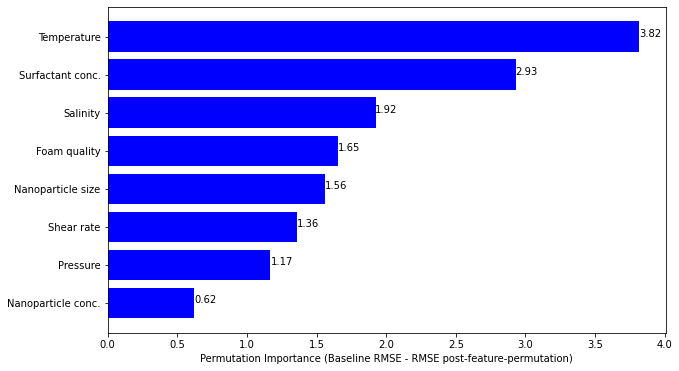

In [86]:
# perform permutation importance
results = permutation_importance(model_SVR, X_train, y_train,
                                 scoring='neg_root_mean_squared_error', 
                                 n_repeats=10, n_jobs=-1, random_state=42)
# get importance
feature_importance = results.importances_mean

train_X.rename(columns = {'temp': 'Temperature',
                          'foam_qual': 'Foam quality',
                          'shear':'Shear rate',
                          'np_conc': 'Nanoparticle conc.',
                          'surf_conc': 'Surfactant conc.',
                          'np_size': 'Nanoparticle size',
                          'pressure': 'Pressure',
                          'salinity': 'Salinity'}, inplace= True)

sorted_feat= sorted(zip(feature_importance, train_X), reverse=False)

# Create two lists from the list of tuples created
value,name = [list(c) for c in zip(*sorted_feat)]

# Plot the features
f = plt.figure(figsize=(10,6))
plt.barh(y = name, width= value, color= 'b')

for index, value in enumerate(value):
  value = round(value,2)
  plt.text(value, index, str(value))

plt.xlabel('Permutation Importance (Baseline RMSE - RMSE post-feature-permutation)')
# plt.ylabel(' Features ')
plt.show()


# f.savefig("/content/drive/MyDrive/Colab Notebooks/shap_plot/pfi.png", bbox_inches='tight', dpi=600)
